Name: Paripalli Shobith

Registration Number: 21BAI1722

Campus: Chennai

G-mail: shobith.paripalli2021@vitstudent.ac.in

In [181]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [182]:
df = pd.read_csv(r"C:\Users\shobi\Downloads\Assignments\winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Data Preprocessing and Visualization

In [183]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [184]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

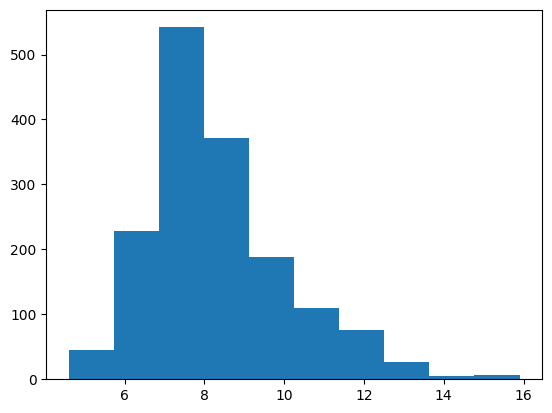

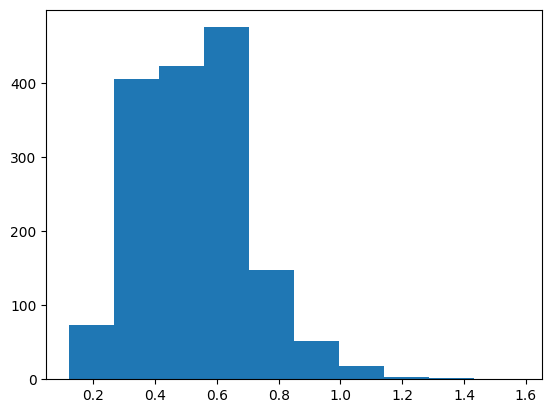

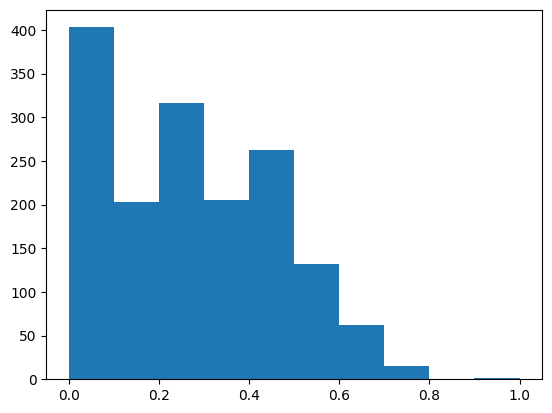

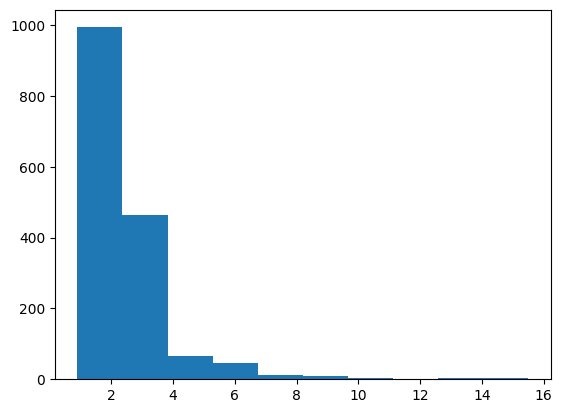

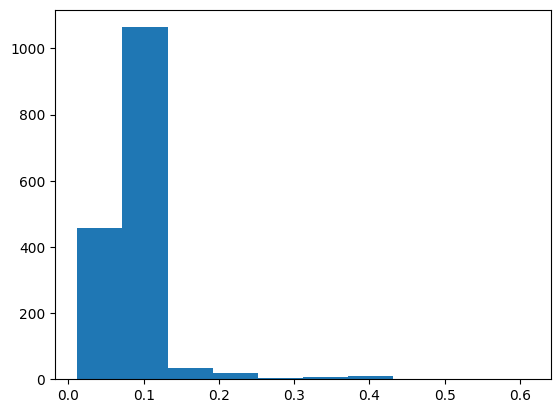

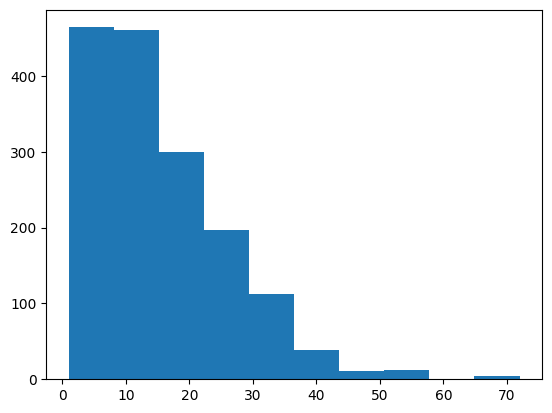

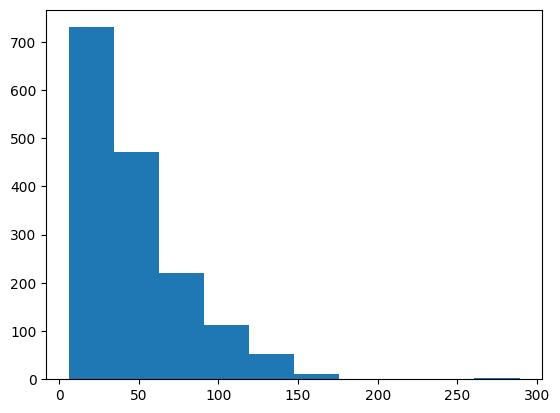

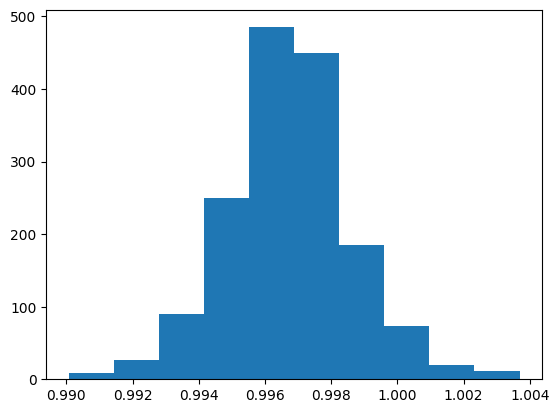

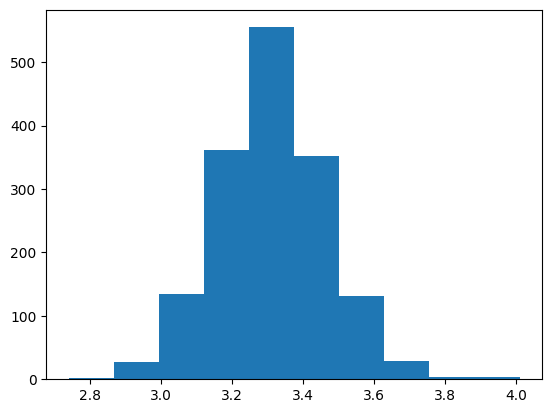

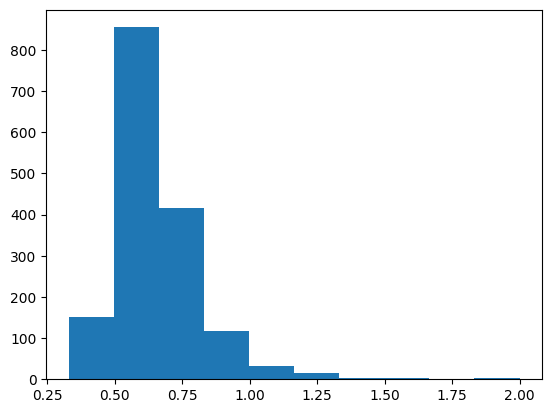

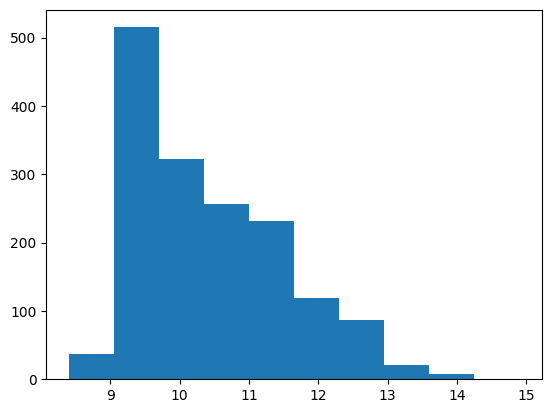

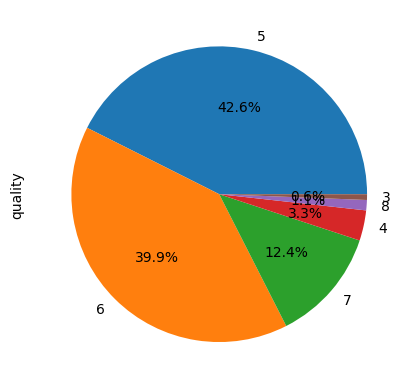

In [185]:
for i in df.columns:
    if(i!='quality'):
        plt.hist(df[i])
        plt.show()
    else:
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        plt.show()

In [186]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [187]:
# Assuming a wine with quality > 6.5 is 'good' [1] & others are 'ordinary' [0]
df['quality'] = df.quality.apply(lambda x : 1 if x > 6.5 else 0)

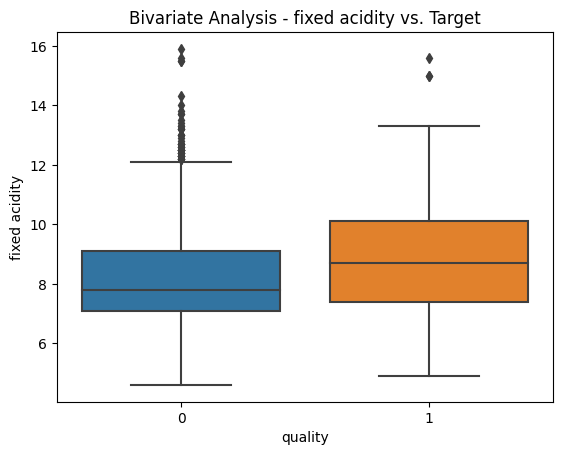

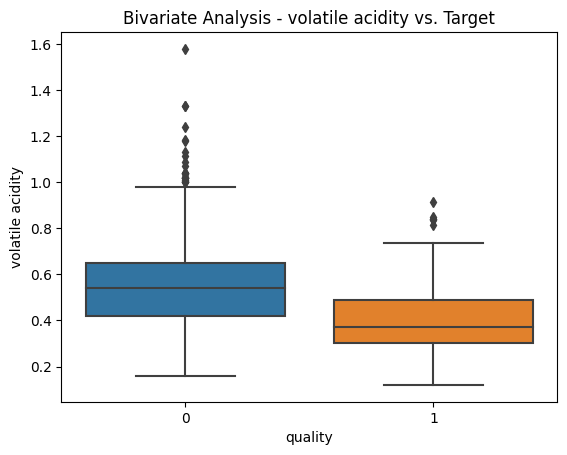

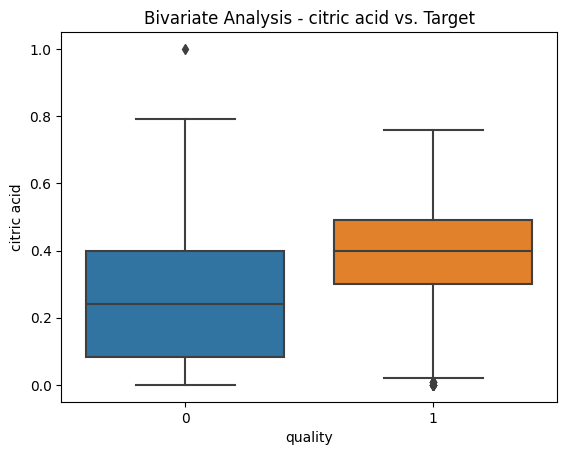

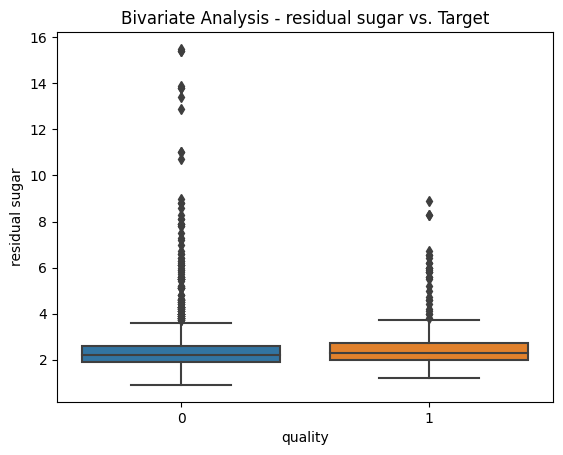

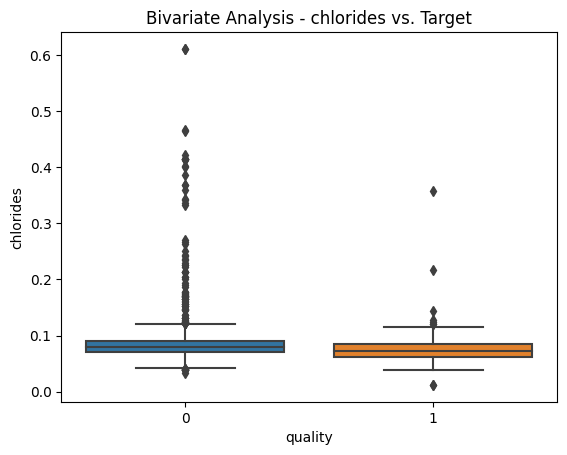

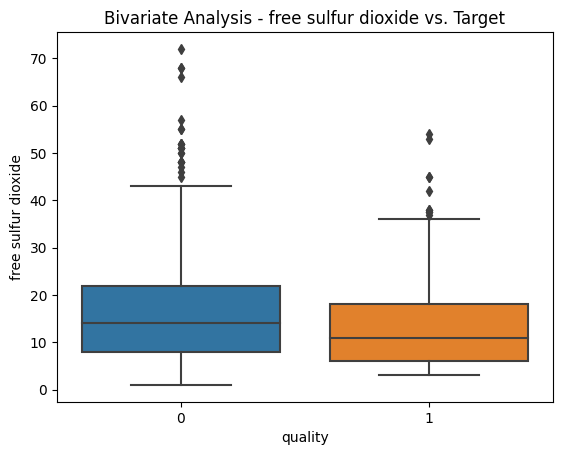

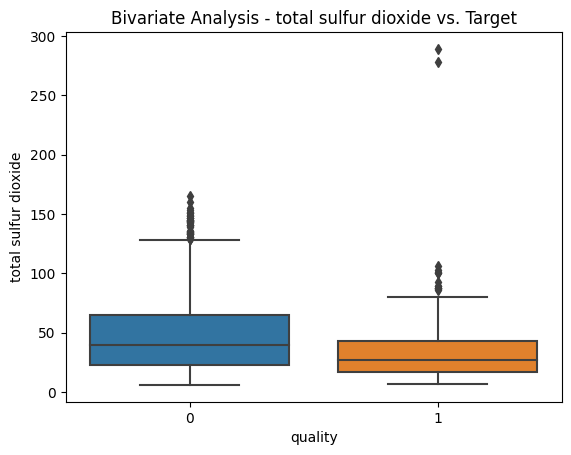

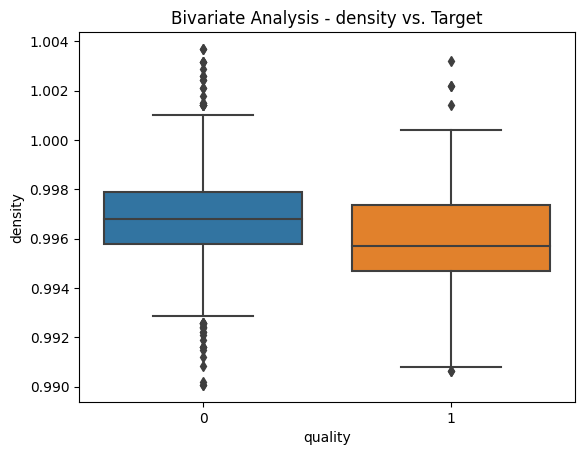

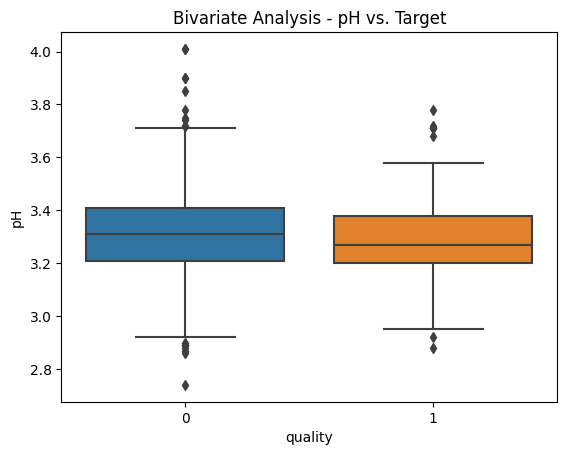

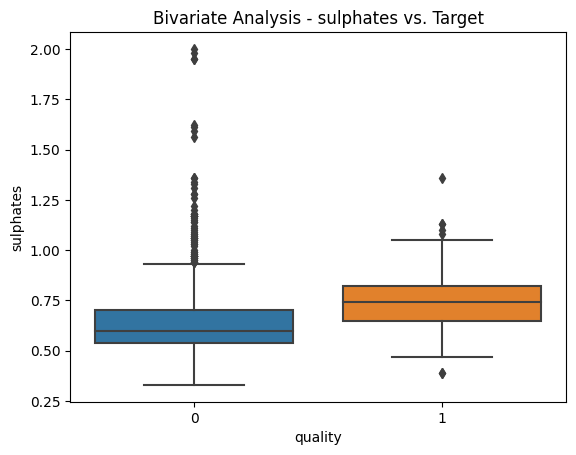

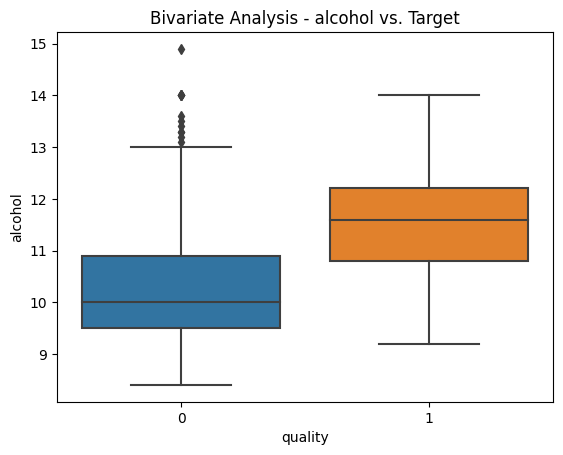

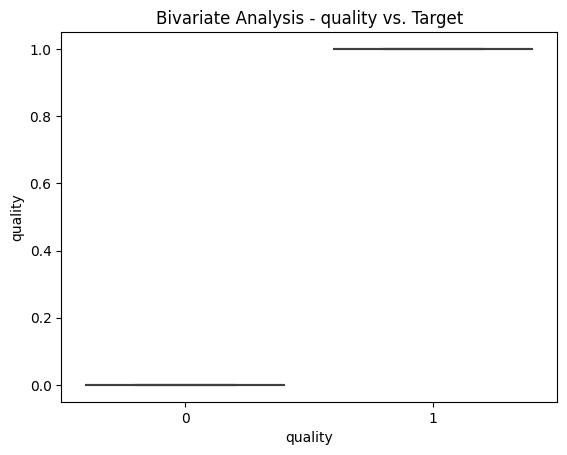

In [198]:
for col in df.columns:
    sns.boxplot(data=df, x='quality', y=col)
    plt.ylabel(col)
    plt.title(f'Bivariate Analysis - {col} vs. Target')
    plt.show()

Building the Model

In [188]:
X = df.drop(columns = ['quality'])
y = df.quality

In [189]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [191]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Evalutate the model

In [192]:
import sklearn.metrics as metrics

y_pred = model.predict(X_test)
print("Classification Report")
print(classification_report(y_test, y_pred))
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred))
print("Precision score:",metrics.precision_score(y_test, y_pred, average = 'macro'))
print("Recall score:",metrics.recall_score(y_test, y_pred, average = 'macro'))


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       413
           1       0.60      0.18      0.28        67

    accuracy                           0.87       480
   macro avg       0.74      0.58      0.60       480
weighted avg       0.84      0.87      0.84       480

Accuracy score: 0.86875
Precision score: 0.7402173913043478
Recall score: 0.5798670087817571


Test with Random Observation

In [196]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [194]:
print("Prediction:",model.predict([[0.283186,0.520548,0.56,0.068493,0.143573,0.098940,0.567548,0.409449,0.137725,0.191617,0.215385]]))

Prediction: [0]


In [195]:
print("Prediction:",model.predict([[0.380531,0.109589,0.45,0.054795,0.091820,0.084507,0.021201,0.254772,0.401575,0.131737,0.600000]]))

Prediction: [1]
